In [1]:
import pandas as pd
import time
import json
import re
import os
import numpy as np
import ast
from pprint import pprint
from pandas.io.json import json_normalize
import pickle

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set(style="whitegrid")

%matplotlib inline


pd.options.display.max_columns = 50

In [2]:
try:
    pickle_off = open(r"/home/sophie/Documents/Certif/SavePickle/data1_test25p.pickle","rb")
    data1_test25p = pickle.load(pickle_off)
    pickle_off.close()
except:
    print("il y a eu 1 Pb avec data1.pickle")
    pass

In [3]:
data1_test25p.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,deviceCategory,operatingSystem,continent,subContinent,country,region,city,visits,newVisits,bounces,hits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactions
0,Referral,2018-05-02,3274048762107183438,Not Socially Engaged,1525286298,1,1525286298,Chrome,desktop,Macintosh,Americas,Northern America,United States,California,Mountain View,1,1.0,NaN,3,3.0,1,23.0,NaN,NaN
1,Referral,2018-07-22,3102818095144736797,Not Socially Engaged,1532279455,1,1532279455,Chrome,desktop,Macintosh,Americas,Northern America,United States,California,Sunnyvale,1,1.0,NaN,52,41.0,66,995.0,67340000.0,1.0
2,Organic Search,2018-05-10,2003235287352658956,Not Socially Engaged,1525944774,1,1525944774,Internet Explorer,tablet,Windows,Asia,Southeast Asia,Singapore,(not set),Singapore,1,1.0,1.0,1,1.0,1,NaN,NaN,NaN
3,Affiliates,2018-07-24,7907909999860357749,Not Socially Engaged,1532496099,1,1532496099,Chrome,desktop,Windows,Asia,Eastern Asia,Taiwan,New Taipei City,(not set),1,1.0,1.0,1,1.0,1,NaN,NaN,NaN
4,Social,2018-05-13,4549822374099137429,Not Socially Engaged,1526216409,1,1526216409,Chrome,desktop,Windows,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,1,1.0,NaN,8,5.0,1,80.0,NaN,NaN


In [4]:
data1_test25p.shape

(100397, 24)

In [5]:
data1_test25p['totalTransactionRevenue'] = data1_test25p['totalTransactionRevenue'].div(1000000)

In [6]:
df = data1_test25p

## Taux de Conversion

In [7]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,deviceCategory,operatingSystem,continent,subContinent,country,region,city,visits,newVisits,bounces,hits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactions
0,Referral,2018-05-02,3274048762107183438,Not Socially Engaged,1525286298,1,1525286298,Chrome,desktop,Macintosh,Americas,Northern America,United States,California,Mountain View,1,1.0,NaN,3,3.0,1,23.0,NaN,NaN
1,Referral,2018-07-22,3102818095144736797,Not Socially Engaged,1532279455,1,1532279455,Chrome,desktop,Macintosh,Americas,Northern America,United States,California,Sunnyvale,1,1.0,NaN,52,41.0,66,995.0,67.34,1.0
2,Organic Search,2018-05-10,2003235287352658956,Not Socially Engaged,1525944774,1,1525944774,Internet Explorer,tablet,Windows,Asia,Southeast Asia,Singapore,(not set),Singapore,1,1.0,1.0,1,1.0,1,NaN,NaN,NaN
3,Affiliates,2018-07-24,7907909999860357749,Not Socially Engaged,1532496099,1,1532496099,Chrome,desktop,Windows,Asia,Eastern Asia,Taiwan,New Taipei City,(not set),1,1.0,1.0,1,1.0,1,NaN,NaN,NaN
4,Social,2018-05-13,4549822374099137429,Not Socially Engaged,1526216409,1,1526216409,Chrome,desktop,Windows,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,1,1.0,NaN,8,5.0,1,80.0,NaN,NaN


In [8]:
df.totalTransactionRevenue.count()

1125

In [9]:
df.fullVisitorId.count()

100397

In [11]:
total = df['fullVisitorId'].nunique()
total

88888

In [12]:
total = df['fullVisitorId'].count()

# Calculate the number of people who bought
buyers = df["totalTransactionRevenue"].count()

# Calculate the conversion rate
conversion_rate = buyers/total
print(round(conversion_rate*100, 2), "%")

1.12 %


### Taux de conversion par continent

In [13]:
usefull_cols = ['continent','totalTransactionRevenue']
dfg = df[usefull_cols]
dfg['conversion'] = dfg['totalTransactionRevenue'].isna()

dfg

/home/sophie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,continent,totalTransactionRevenue,conversion
0,Americas,NaN,True
1,Americas,67.34,False
2,Asia,NaN,True
3,Asia,NaN,True
4,Asia,NaN,True
...,...,...,...
100392,Americas,NaN,True
100393,Americas,NaN,True
100394,Asia,NaN,True
100395,Europe,NaN,True


In [14]:
dfg.groupby(by='continent').conversion.value_counts()

continent  conversion
(not set)  True            100
Africa     True           1749
Americas   True          53134
           False          1082
Asia       True          21314
           False            19
Europe     True          21026
           False            23
Oceania    True           1949
           False             1
Name: conversion, dtype: int64

In [15]:
tx_conversion = pd.crosstab(dfg.continent, dfg.conversion)
tx_conversion.columns=['achat', 'abandon']
tx_conversion

,achat,abandon
continent,,
(not set),0,100
Africa,0,1749
Americas,1082,53134
Asia,19,21314
Europe,23,21026
Oceania,1,1949


In [16]:
tx_conversion['tx_conv']=round((tx_conversion['achat']/(tx_conversion['achat']+tx_conversion['abandon'])*100), 2)

In [17]:
tx_conversion

,achat,abandon,tx_conv
continent,,,
(not set),0,100,0.00
Africa,0,1749,0.00
Americas,1082,53134,2.00
Asia,19,21314,0.09
Europe,23,21026,0.11
Oceania,1,1949,0.05


In [18]:
tx_conversion = tx_conversion.sort_values(["tx_conv"], ascending=[0])
tx_conversion

,achat,abandon,tx_conv
continent,,,
Americas,1082,53134,2.00
Europe,23,21026,0.11
Asia,19,21314,0.09
Oceania,1,1949,0.05
(not set),0,100,0.00
Africa,0,1749,0.00


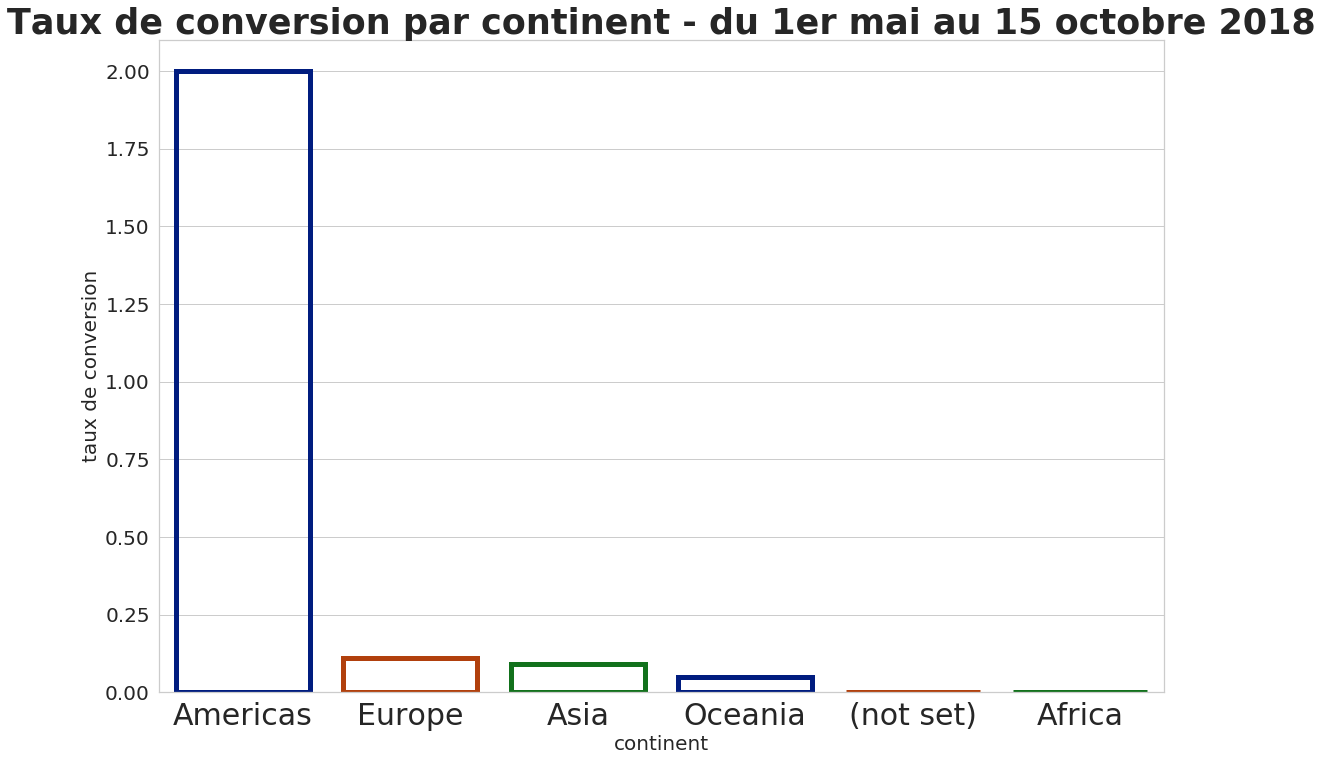

In [19]:
plt.figure(figsize=(18,12))
sns.set(style="whitegrid")

ax = sns.barplot(x="continent", y="tx_conv", data=tx_conversion.reset_index(), facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.title('Taux de conversion par continent - du 1er mai au 15 octobre 2018', fontsize=35, weight='bold')
plt.xlabel('continent', fontsize=20)
plt.ylabel('taux de conversion', fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.savefig("Taux de conversion par continent");

### Nb de connexions

In [20]:
nbsession = df.groupby(['date'])['date'].count()
nbsession

date
2018-05-01    725
2018-05-02    753
2018-05-03    804
2018-05-04    720
2018-05-05    533
             ... 
2018-10-11    713
2018-10-12    609
2018-10-13    477
2018-10-14    470
2018-10-15    702
Name: date, Length: 168, dtype: int64

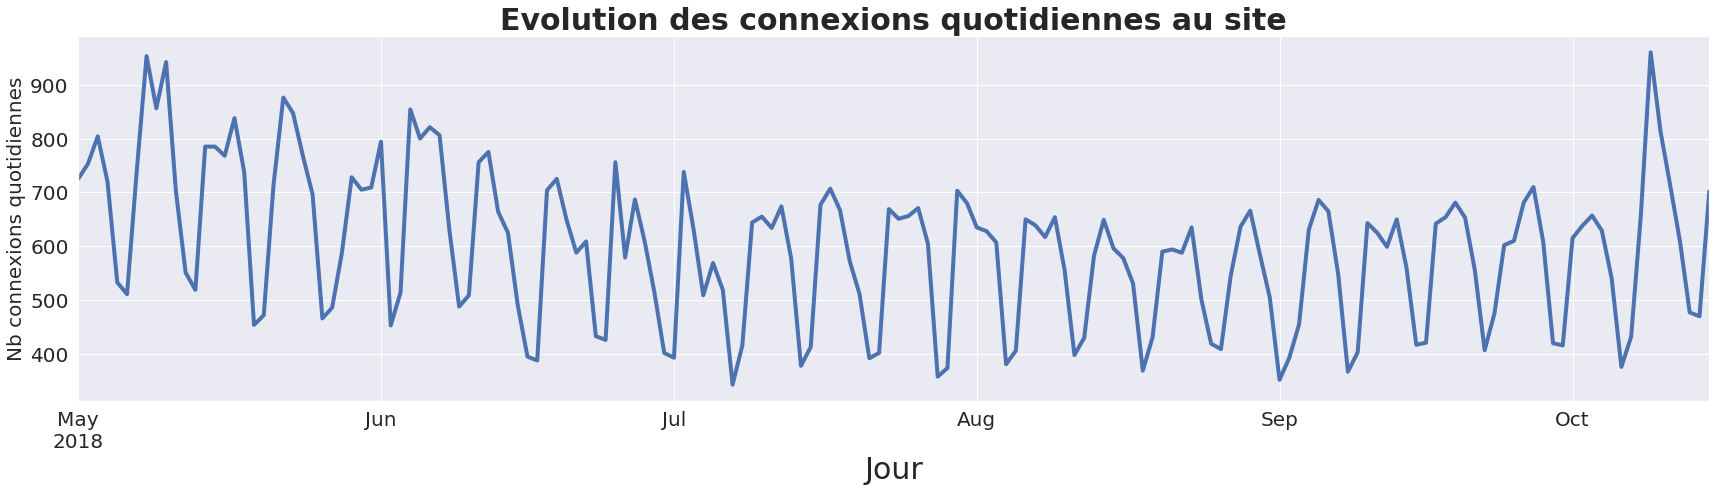

In [21]:
sns.set(rc={'figure.figsize':(24, 7)})
ax=df.groupby('date').size().plot(linewidth=4, fontsize=20)
ax.set_ylabel('Nb connexions quotidiennes', fontsize=20)
ax.set_xlabel('Jour', fontsize=30)
#ax.set_ylim(0, 0.3) mettre l'échelle des ordonnées
ax.set_title('Evolution des connexions quotidiennes au site', fontsize=30, weight='bold')
plt.tight_layout()
plt.savefig('Evolution des connections quotidiennes au site.png');

In [22]:
df['year'] = data1_test25p['date'].dt.year
df['month'] = data1_test25p['date'].dt.month
df['day'] = data1_test25p['date'].dt.day
df['dayofweek'] = data1_test25p['date'].dt.weekday_name

In [23]:
from pandas.api.types import CategoricalDtype

In [24]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['dayofweek'] = df['dayofweek'].astype(cat_type)

In [25]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,deviceCategory,operatingSystem,continent,subContinent,country,region,city,visits,newVisits,bounces,hits,pageviews,sessionQualityDim,timeOnSite,totalTransactionRevenue,transactions,year,month,day,dayofweek
0,Referral,2018-05-02,3274048762107183438,Not Socially Engaged,1525286298,1,1525286298,Chrome,desktop,Macintosh,Americas,Northern America,United States,California,Mountain View,1,1.0,NaN,3,3.0,1,23.0,NaN,NaN,2018,5,2,Wednesday
1,Referral,2018-07-22,3102818095144736797,Not Socially Engaged,1532279455,1,1532279455,Chrome,desktop,Macintosh,Americas,Northern America,United States,California,Sunnyvale,1,1.0,NaN,52,41.0,66,995.0,67.34,1.0,2018,7,22,Sunday
2,Organic Search,2018-05-10,2003235287352658956,Not Socially Engaged,1525944774,1,1525944774,Internet Explorer,tablet,Windows,Asia,Southeast Asia,Singapore,(not set),Singapore,1,1.0,1.0,1,1.0,1,NaN,NaN,NaN,2018,5,10,Thursday
3,Affiliates,2018-07-24,7907909999860357749,Not Socially Engaged,1532496099,1,1532496099,Chrome,desktop,Windows,Asia,Eastern Asia,Taiwan,New Taipei City,(not set),1,1.0,1.0,1,1.0,1,NaN,NaN,NaN,2018,7,24,Tuesday
4,Social,2018-05-13,4549822374099137429,Not Socially Engaged,1526216409,1,1526216409,Chrome,desktop,Windows,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,1,1.0,NaN,8,5.0,1,80.0,NaN,NaN,2018,5,13,Sunday


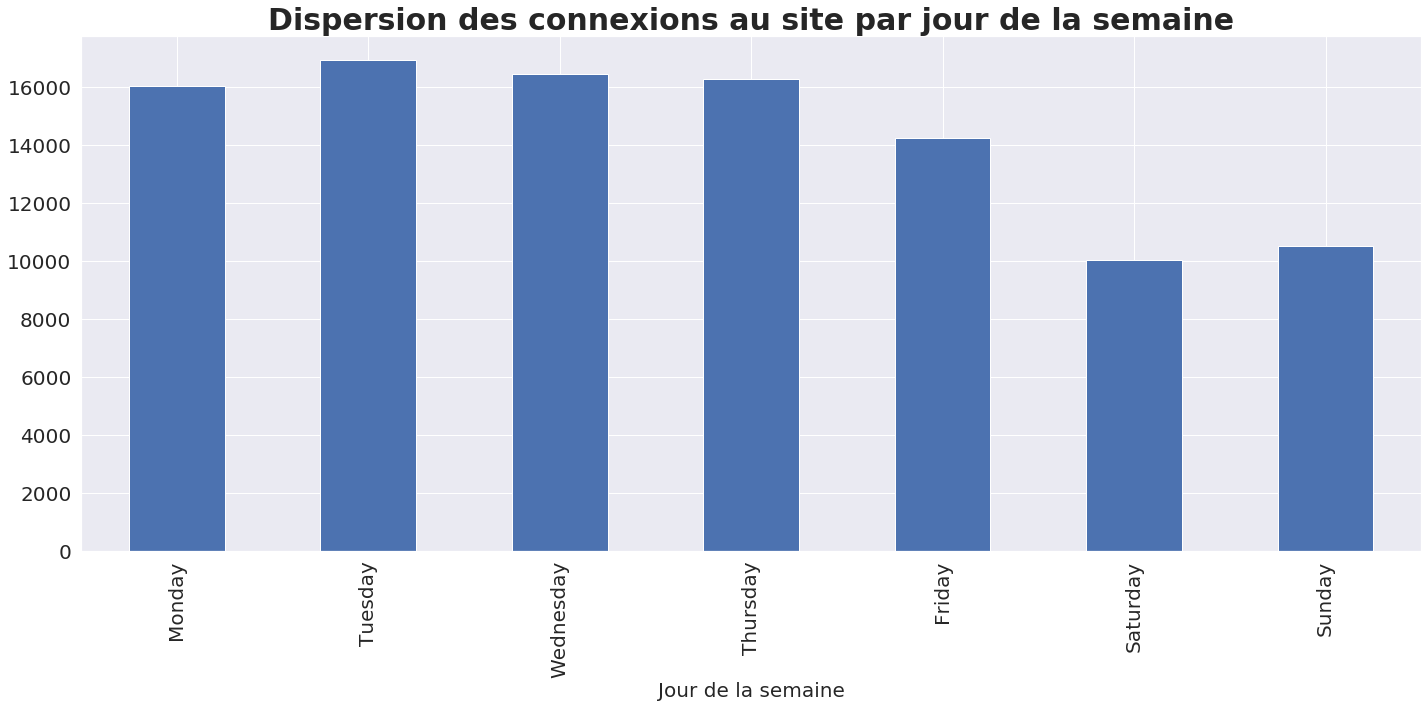

In [26]:
plt.figure(figsize=(20,10))
groups = df.groupby('dayofweek', sort=False).size()
groups.plot.bar(fontsize=20)
plt.xlabel('Jour de la semaine', fontsize=20)
plt.title("Dispersion des connexions au site par jour de la semaine", fontsize=30, weight='bold')
plt.xticks(fontsize=20)
plt.tight_layout()
plt.savefig('Dispersion des connections au site par jour de la semaine.png');

### Provenance géographique

In [27]:
dfcountry = df.groupby(['country'])['date'].count()
dfcountry

country
(not set)      100
Afghanistan      3
Albania         11
Algeria         80
Andorra          9
              ... 
Venezuela       51
Vietnam        631
Yemen           10
Zambia           5
Zimbabwe         3
Name: date, Length: 188, dtype: int64

In [28]:
df_visitor = df[['fullVisitorId', 'visitId', 'visitNumber', 'continent', 'subContinent', 'region', 'country', 'city', 'browser', 'deviceCategory', 'operatingSystem']] 

In [29]:
regionc = df_visitor.region.value_counts()
regionc.drop(regionc.index[[0,3]], inplace=True)
regionc.head(10)

California     14061
New York        3478
England         1984
Texas           1271
Taipei City     1196
Maharashtra     1001
Karnataka        978
Illinois         975
Washington       934
Delhi            858
Name: region, dtype: int64

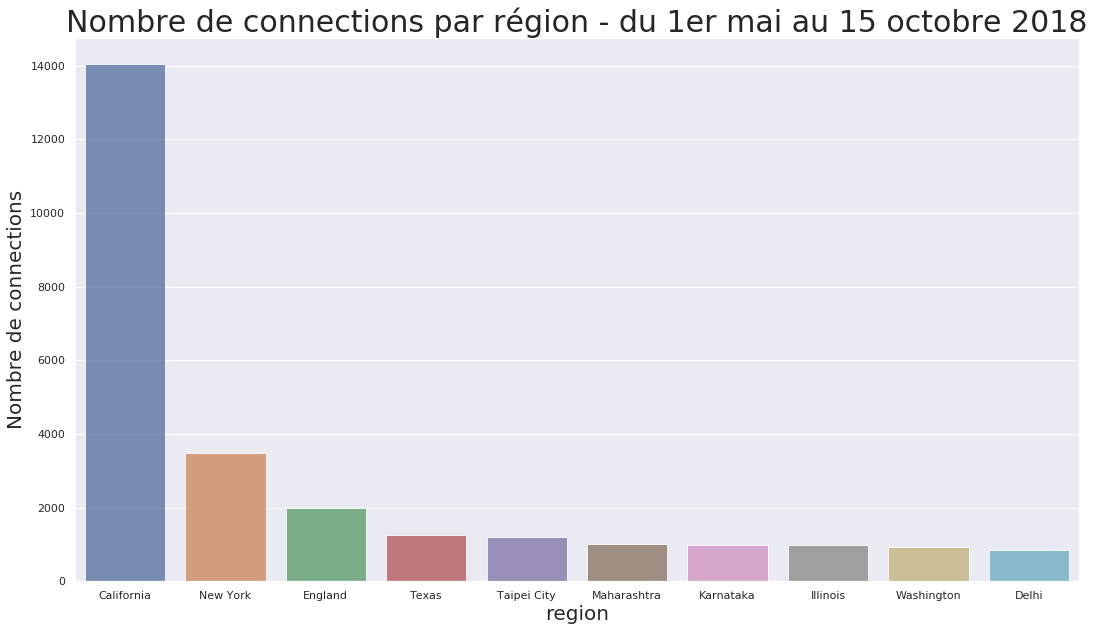

In [30]:
plt.close('all')
region_count  = df_visitor['region'].value_counts()
region_count.drop(region_count.index[[0,3]], inplace=True)
region_count = region_count[:10,]
plt.figure(figsize=(18,10))
sns.barplot(region_count.index, region_count.values, alpha=0.8)
plt.title('Nombre de connections par région - du 1er mai au 15 octobre 2018', fontsize=30)
plt.ylabel('Nombre de connections', fontsize=20)
plt.xlabel('region', fontsize=20)
plt.savefig("Nombre de connections par région.png");

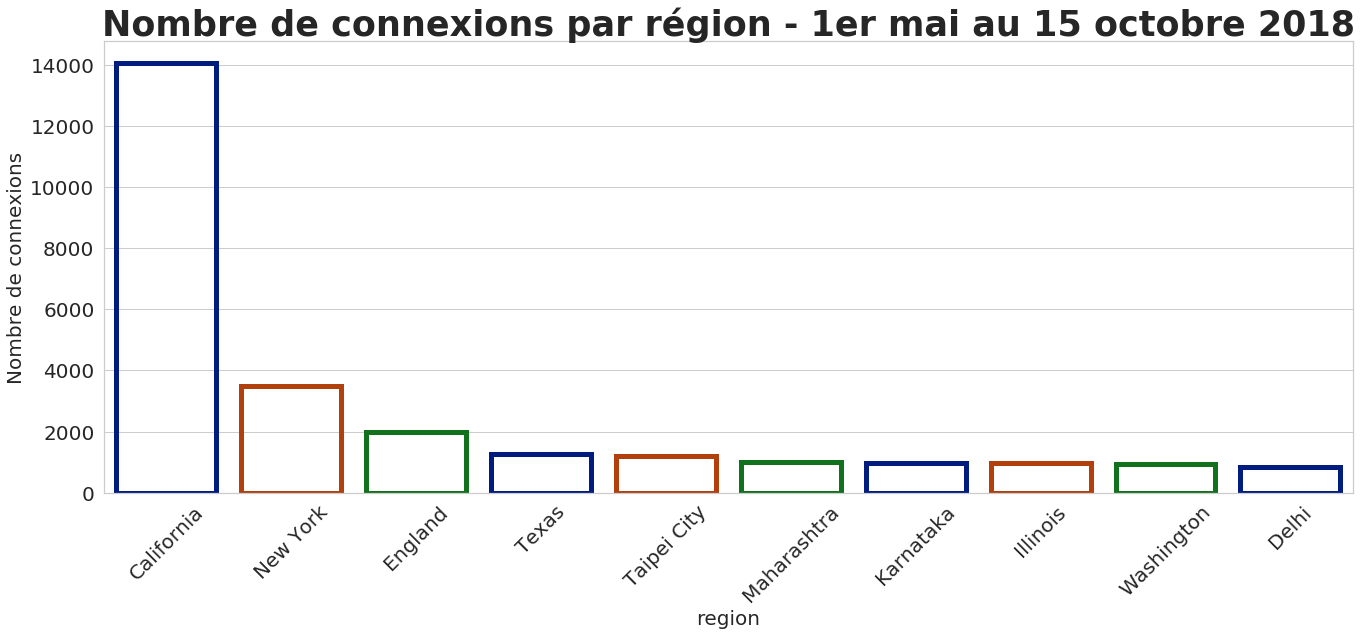

In [31]:
region_count  = df_visitor['region'].value_counts()
region_count.drop(region_count.index[[0,3]], inplace=True)
region_count = region_count[:10,]

sns.set(style="whitegrid")
plt.figure(figsize=(20,9))
sns.barplot(region_count.index, region_count.values, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.title('Nombre de connexions par région - 1er mai au 15 octobre 2018', fontsize=35, weight='bold')
plt.xlabel('region', fontsize=20)
plt.ylabel('Nombre de connexions', fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.tight_layout()  
plt.savefig("Nombre de connections - régions.png");


### Source du traffic

In [32]:
df.channelGrouping.value_counts()

Organic Search    49759
Direct            19020
Referral          14886
Social             9135
Paid Search        3161
Affiliates         2699
Display            1737
Name: channelGrouping, dtype: int64

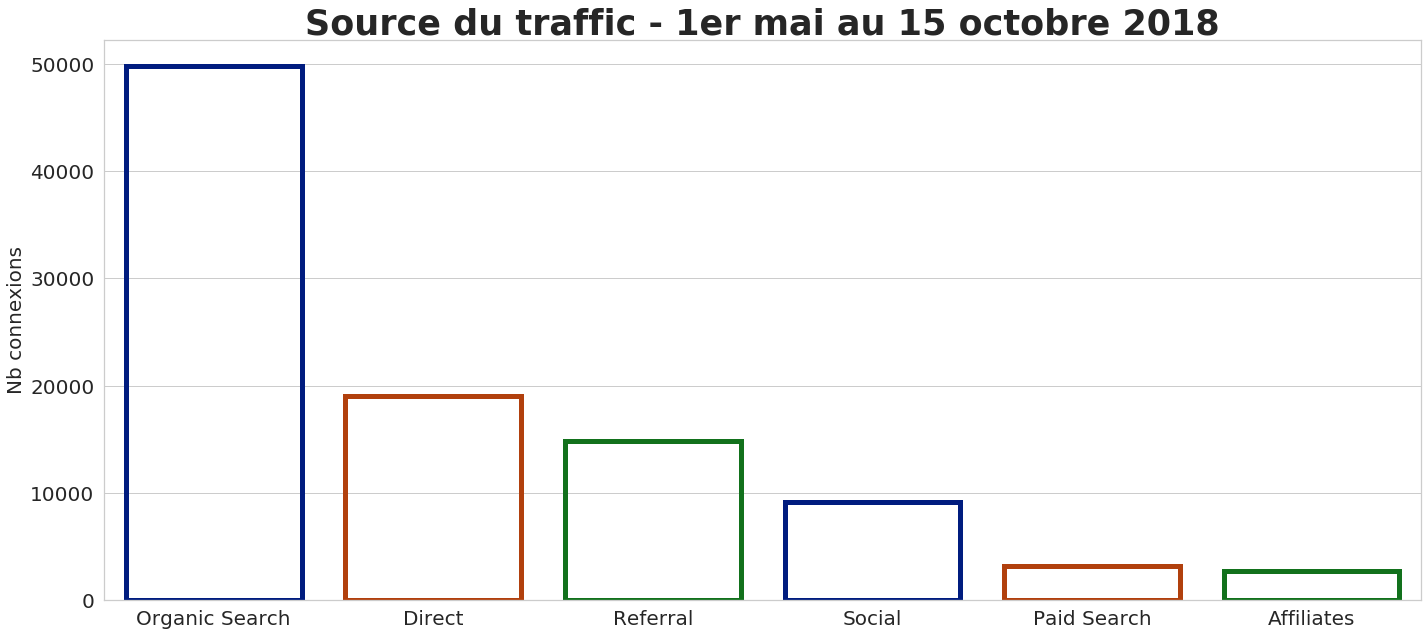

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,9))
sns.barplot(x=df['channelGrouping'].value_counts()[:6].index,y=data1_test25p['channelGrouping'].value_counts()[:6].values, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.title('Source du traffic - 1er mai au 15 octobre 2018', fontsize=35, weight='bold')
plt.ylabel('Nb connexions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()  
plt.savefig("Source du traffic.png");
# hue with bounce?


In [35]:
df_visitor.operatingSystem.value_counts()

Windows             34420
Macintosh           25688
Android             16275
iOS                 13405
Chrome OS            5209
Linux                4096
(not set)            1136
Samsung                99
Tizen                  33
Windows Phone          21
BlackBerry              4
OS/2                    4
Xbox                    2
SymbianOS               1
Firefox OS              1
SunOS                   1
Playstation Vita        1
Nintendo WiiU           1
Name: operatingSystem, dtype: int64

## Produits

In [36]:
try:
    pickle_off = open(r"SavePickle/produits.pickle","rb")
    produits = pickle.load(pickle_off)
    pickle_off.close()
except:
    print("il y''a eu 1 Pb avec produits.pickle")
    pass

In [37]:
try:
    pickle_off = open(r"SavePickle/product_nav.pickle","rb")
    product_nav = pickle.load(pickle_off)
    pickle_off.close()
except:
    print("il y''a eu 1 Pb avec product_nav.pickle")
    pass

In [38]:
produits.head()

,productSKU,v2ProductName,v2ProductCategory,productPrice
0,GGOEGXXX1041,Google Tonal Tee Fog,Home/Apparel/Men's/Men's T-Shirts/,21990000
1,GGOEGXXX1042,Google Tonal Tee Spearmint,Home/Apparel/Men's/Men's T-Shirts/,21990000
2,GGOEGXXX1043,Google Tonal Tee Coral,Home/Apparel/Men's/Men's T-Shirts/,21990000
3,GGOEGXXX1044,Google Tonal Tee Slate Grey,Home/Apparel/Men's/Men's T-Shirts/,21990000
4,GGOEAXXX1038,Android Unisex Pride Tee,Home/Apparel/Men's/Men's T-Shirts/,23990000


In [29]:
product_nav.head()

,date,fullVisitorId,visitId,tous_skus
0,2018-05-02,3274048762107183438,1525286298,NaN
1,2018-07-22,3102818095144736797,1532279455,GGOEGXXX1041
1,2018-07-22,3102818095144736797,1532279455,GGOEGXXX1042
1,2018-07-22,3102818095144736797,1532279455,GGOEGXXX1043
1,2018-07-22,3102818095144736797,1532279455,GGOEGXXX1044


In [39]:
product_info = product_nav.merge(produits, left_on='tous_skus', right_on='productSKU')

In [40]:
product_info.head()

,date,fullVisitorId,visitId,tous_skus,productSKU,v2ProductName,v2ProductCategory,productPrice
0,2018-07-22,3102818095144736797,1532279455,GGOEGXXX1041,GGOEGXXX1041,Google Tonal Tee Fog,Home/Apparel/Men's/Men's T-Shirts/,21990000
1,2018-08-03,128883584343040357,1533329572,GGOEGXXX1041,GGOEGXXX1041,Google Tonal Tee Fog,Home/Apparel/Men's/Men's T-Shirts/,21990000
2,2018-08-03,128883584343040357,1533329572,GGOEGXXX1041,GGOEGXXX1041,Google Tonal Tee Fog,Home/Apparel/Men's/Men's T-Shirts/,21990000
3,2018-07-08,9719655401638018461,1531077924,GGOEGXXX1041,GGOEGXXX1041,Google Tonal Tee Fog,Home/Apparel/Men's/Men's T-Shirts/,21990000
4,2018-07-08,9719655401638018461,1531077924,GGOEGXXX1041,GGOEGXXX1041,Google Tonal Tee Fog,Home/Apparel/Men's/Men's T-Shirts/,21990000


In [64]:
product_hit = product_info.groupby('v2ProductName').size().sort_values(ascending=False).head(10)
product_hit

v2ProductName
YouTube Transmission Bottle Black      38381
YouTube Transmission Journal Black     37324
Google Mouse Pad Navy                  36625
YouTube Tee Black                      36565
Google Zip Hoodie Black                35999
YouTube Twill Sandwich Cap Black       35801
YouTube 25 oz Gear Cap Bottle Black    33959
Google Pullover Hoodie Grey            33448
Google Crewneck Sweatshirt Navy        32447
Google Rucksack                        29331
dtype: int64